# Project: Investigate No Show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset contains information about patients scheduling doctor's appointment in Brasil, explaining whether they show up for the appointment or not.The title and the question posted on the website, asking why 30% of patient missed their scheduled appointment help to give clarity to the contents of some columns, for instance the "No show" column: where no stand for the patient showing up and yes if they did not show up. The dataset is available [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

#### Column names
>**patient_id**: identification of patient. <br>
>**appointment_id**: identification of each appointment. <br>
>**scheduled_day**: the day the patient call in to book for an appointment, it is before appointment day. <br>
>**appointment_day**: the day the patient is to see the doctor. <br>
>**scholarship**: indicate whether the patient receive financial aid from government or not. details can be found [here](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).<br>
>**hypertension**: indicate whether patient has hypertension or not.<br>
>**diabetes**: indicate whether patient has diabetes or not.<br>
>**alcoholism**: indicate whether patient is suffering from alcoholism or not.<br>
>**handicap**: indicate whether patient has disabilty or not.<br>
>**sms_received**: indicate whether patient received message to remind them of their appointment or not.<br>
>**no_show**: indicate whether patient show up for their appointment or not, with 'no' specifying they show up and 'yes' specifying they did not show up.<br>


### Question(s) for Analysis
>1) Did disability have influence on the patient showing for appointment? <br>
>2) Did receiving a reminder message improve the chances of patient showing up for appointment? <br>
>3) Did severity of symptoms has influence on the patient showing up for appointment? <br>
>4) How many patient with scholarship showed up for appointment and how many did not?

In [281]:
# Import packages needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adding the magic funtion for interactivity of the plot.
%matplotlib inline


In [282]:
# Load data for analysis
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [283]:
# Understanding the dataset by calling the info() function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [284]:
# Give the statistical breakdown.

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [285]:
# Calling this fuction to know the columns and the number of rows

df.shape

(110527, 14)

In [286]:
# To know the data types

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [287]:
# To investigate the null value.

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [288]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [289]:
# To know the number of duplicated data

sum(df.duplicated())

0


### Data Cleaning
 

In [290]:
# Change all the columns to lower case
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

df.head()


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [291]:
# Remove the columns i will not be using in my analysis.

df.drop(['gender','age','neighbourhood'], axis=1, inplace=True)

In [292]:
# Check for changes

df.tail()

,patientid,appointmentid,scheduledday,appointmentday,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
110522,2.572134e+12,5651768,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,0,0,0,0,0,1,No


In [293]:
# Replace compount letters to include hyphen and replace dash with hyphen
df.rename(columns = {'patientid':'patient_id', 'appointmentid':'appointment_id', 'scheduledday':'scheduled_day','appointmentday':'appointment_day','no-show':'no_show'}, inplace=True)

df.head()

,patient_id,appointment_id,scheduled_day,appointment_day,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,1,0,0,0,0,No
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,No
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,No
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,No
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,1,1,0,0,0,No


In [294]:
# Correct spelling for wrongly spelt columns
df.rename(columns = {'hipertension':'hypertension','handcap':'handicap'}, inplace=True)

df.head(30)

,patient_id,appointment_id,scheduled_day,appointment_day,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,0,1,0,0,0,0,No
1,5.589978e+14,5642503,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,No
2,4.262962e+12,5642549,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,No
3,8.679512e+11,5642828,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,No
4,8.841186e+12,5642494,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,0,1,1,0,0,0,No
5,9.598513e+13,5626772,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,0,1,0,0,0,0,No
6,7.336882e+14,5630279,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,No
9,7.812456e+13,5629123,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,0,0,0,0,0,0,No


In [295]:
# Checking scheduled_day data type
type(df['scheduled_day'][0])

str

In [296]:
# Checking appointment_day data type
type(df['appointment_day'][0])

str

I got idea on how to extract letters from numbers [here](https://stackoverflow.com/questions/44117326/how-can-i-remove-all-non-numeric-characters-from-all-the-values-in-a-particular#:~:text=To%20remove%20all%20non-digit%20characters%20from%20strings%20in,digits%20%28like%20%DB%B1%DB%B2%DB%B3%DB%B4%DB%B5%DB%B6%DB%B7%DB%B8%DB%B9%2C%20see%20proof%29%20you%20should%20consider)

In [297]:
# extracting letters from scheduled_day
df['scheduled_day'] = df['scheduled_day'].str.replace(r"[a-zA-Z]",'')

C:\Users\user\AppData\Local\Temp\ipykernel_16540\843577000.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['scheduled_day'] = df['scheduled_day'].str.replace(r"[a-zA-Z]",'')


In [298]:
# Confirming the changes

df['scheduled_day'].head()

0    2016-04-2918:38:08
1    2016-04-2916:08:27
2    2016-04-2916:19:04
3    2016-04-2917:29:31
4    2016-04-2916:07:23
Name: scheduled_day, dtype: object

I got inspiration on how to add white space from [here](https://stackoverflow.com/questions/59762788/how-to-insert-space-in-pandas-column-string)

In [299]:
# input white space to seperate date from time
# the space will come after the first 10 character which signify the date
df['scheduled_day'] = [v[:-8] + " " + v[10:]for v in df['scheduled_day']]

In [300]:
# Confirming the changes.

df['scheduled_day']

0         2016-04-29 18:38:08
1         2016-04-29 16:08:27
2         2016-04-29 16:19:04
3         2016-04-29 17:29:31
4         2016-04-29 16:07:23
                 ...         
110522    2016-05-03 09:15:35
110523    2016-05-03 07:27:33
110524    2016-04-27 16:03:52
110525    2016-04-27 15:09:23
110526    2016-04-27 13:30:56
Name: scheduled_day, Length: 110527, dtype: object

I learnt how to convert strings to timestamp [here](https://datatofish.com/strings-to-datetime-pandas/)

In [301]:
# Converting scheduled_day data to a timestamp
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'], format='%Y-%m-%d %H:%M:%S')

type(df['scheduled_day'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [302]:
# extracting letters from appointment_day
df['appointment_day'] = df['appointment_day'].str.replace(r"[a-zA-Z]",'')

C:\Users\user\AppData\Local\Temp\ipykernel_16540\3762568953.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['appointment_day'] = df['appointment_day'].str.replace(r"[a-zA-Z]",'')


In [303]:
# Confirming the chnages.

df['appointment_day'].head()

0    2016-04-2900:00:00
1    2016-04-2900:00:00
2    2016-04-2900:00:00
3    2016-04-2900:00:00
4    2016-04-2900:00:00
Name: appointment_day, dtype: object

In [304]:
# input white space to seperate date from time
# the space will come after the first 10 character which signify the date
df['appointment_day'] = [v[:-8] + " " + v[10:]for v in df['appointment_day']]

In [305]:
# Confirming the changes.

df['appointment_day'].head()

0    2016-04-29 00:00:00
1    2016-04-29 00:00:00
2    2016-04-29 00:00:00
3    2016-04-29 00:00:00
4    2016-04-29 00:00:00
Name: appointment_day, dtype: object

In [306]:
# Converting appointment_day data to a timestamp
df['appointment_day'] = pd.to_datetime(df['appointment_day'], format='%Y-%m-%d %H:%M:%S')

type(df['scheduled_day'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [307]:
# Checking for changes made
df.head()

,patient_id,appointment_id,scheduled_day,appointment_day,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,2016-04-29 18:38:08,2016-04-29,0,1,0,0,0,0,No
1,5.589978e+14,5642503,2016-04-29 16:08:27,2016-04-29,0,0,0,0,0,0,No
2,4.262962e+12,5642549,2016-04-29 16:19:04,2016-04-29,0,0,0,0,0,0,No
3,8.679512e+11,5642828,2016-04-29 17:29:31,2016-04-29,0,0,0,0,0,0,No
4,8.841186e+12,5642494,2016-04-29 16:07:23,2016-04-29,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


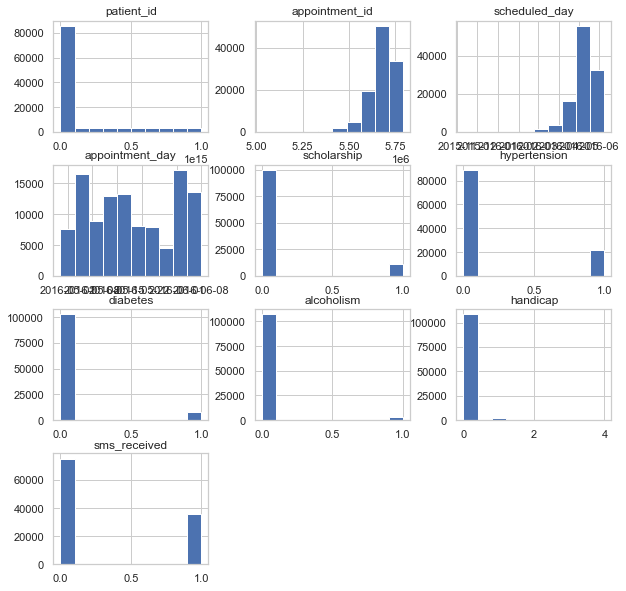

In [308]:
# Exploratory Data Analysis

df.hist(figsize= (10,10));

### Reseach Question 1: Did disability have influence on the patient showing for appointment? 

Finding appropriate graph to plot no_show (a binary variable) against the handicap variable(a categorical variable) was not possible with histogram, so i followed the step found [here](https://stats.stackexchange.com/questions/520731/how-to-plot-binary-vs-categorical-nominal-data)

In [309]:
# Investigating the unique value in handicap.

df['handicap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [338]:
# wrapping the code in a funtion to avoid repetition
def catplot_graph (column):
    sns.catplot(x='no_show',hue=column,data=df,kind="count")

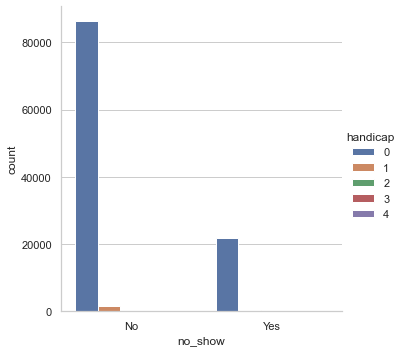

In [339]:
# Plotting a catplot to show the relationship between handicap category and no_show column.

catplot_graph('handicap')

### Explanation of the visual
Handicap categories are as follows: <br>
0 = No disability <br>
1 = One disability <br>
2 = Two disabilities <br>
3 = Three disabilities <br>
4 = Four disabilities  <br>
It was well explained [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments/discussion/29699)<br>

In the no_show column, <br>
No = showed up for appointment <br>
Yes = did not show up for appointment. <br>

Generally, those that showed up for their appointment are 4times higher than those that did not show up and the number of people without disability that showed up for their appointment are way higher than people with disability. This may be as a result of difficulties that comes with being disabled. 

### Research Question 2: Did receiving a reminder message improve the chances of patient showing up for appointment?

In [312]:
# Getting information about the sms_received column.

df['sms_received'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110527 entries, 0 to 110526
Series name: sms_received
Non-Null Count   Dtype
--------------   -----
110527 non-null  int64
dtypes: int64(1)
memory usage: 863.6 KB


In [313]:
# Investigating the unique value

df['sms_received'].unique()

array([0, 1], dtype=int64)

In [314]:
# Investigating the number of unique value.

df['sms_received'].nunique()

2

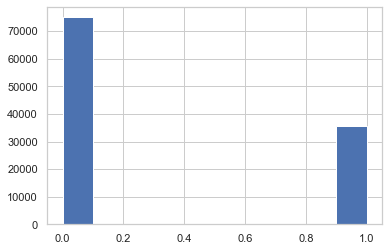

In [315]:
# Plotting histogram to understand with visualization the numbers of people that received sms and those that do not
# The 0 stand for did not receive sms and 1 received sms

df['sms_received'].hist();

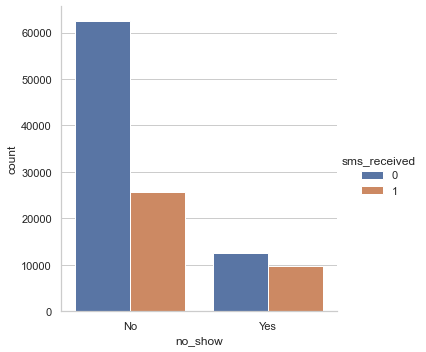

In [316]:
# Plotting a catplot to show the relationship between sms received category and no_show column with the previously created function.

catplot_graph('sms_received')

The numbers of patient that did not receive a reminder message but showed up regardless is higher than those that received reminder messages. This inferred that receiving a reminder message did not have an influence on the patient's decision to show up or not.

### Research Question 3: Did severity of symptoms has influence on the patient showing up for appointment? 


In [317]:
# Splitting the no_show column into the two values

show_up = df[df['no_show'] == "No"]

show_up.head()

,patient_id,appointment_id,scheduled_day,appointment_day,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,2016-04-29 18:38:08,2016-04-29,0,1,0,0,0,0,No
1,5.589978e+14,5642503,2016-04-29 16:08:27,2016-04-29,0,0,0,0,0,0,No
2,4.262962e+12,5642549,2016-04-29 16:19:04,2016-04-29,0,0,0,0,0,0,No
3,8.679512e+11,5642828,2016-04-29 17:29:31,2016-04-29,0,0,0,0,0,0,No
4,8.841186e+12,5642494,2016-04-29 16:07:23,2016-04-29,0,1,1,0,0,0,No


In [318]:
no_show_up = df[df['no_show'] == "Yes"]

no_show_up.head()

,patient_id,appointment_id,scheduled_day,appointment_day,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
6,7.336882e+14,5630279,2016-04-27 15:05:12,2016-04-29,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,2016-04-27 15:39:58,2016-04-29,0,0,0,0,0,0,Yes
11,7.542951e+12,5620163,2016-04-26 08:44:12,2016-04-29,0,0,0,0,0,1,Yes
17,1.479497e+13,5633460,2016-04-28 09:28:57,2016-04-29,1,0,0,0,0,0,Yes
20,6.222575e+14,5626083,2016-04-27 07:51:14,2016-04-29,0,0,0,0,0,0,Yes


In [319]:
# Investigating the alcoholism column

df['alcoholism'].value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

In [320]:
# wrapping the code in a function to avoid repetition

def plot_graph(ailment):
    fig, ax = plt.subplots(figsize =(8,6))
    ax.hist(show_up[ailment], alpha=0.5, label='show_up')
    ax.hist(no_show_up[ailment], alpha=0.5, label='no_show_up')
    ax.set_title(f'Distribution of Show up and No show up against {ailment.title()}')
    ax.set_xlabel('Area')
    ax.set_ylabel('Count')
    ax.legend(loc='upper right')
    plt.show()


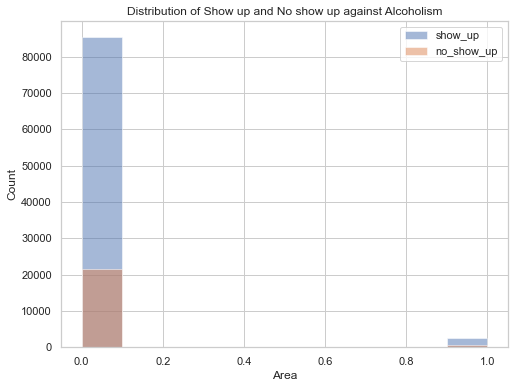

In [321]:
# Plotting an histogram showing the relationship between alcoholism, show up and no show up variables with the previously created function.

plot_graph('alcoholism')

In [322]:
# Investigating the hypertension column.

df['hypertension'].value_counts()

0    88726
1    21801
Name: hypertension, dtype: int64

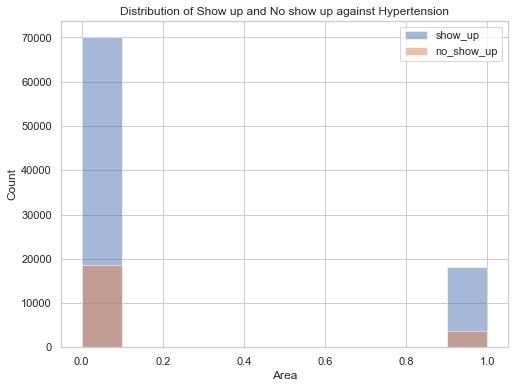

In [323]:
# Plotting an histogram showing the relationship between hypertension, show up and no show up variables with the previously created function.


plot_graph('hypertension')

In [324]:
# Investigating the diabetes column.

df['diabetes'].value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

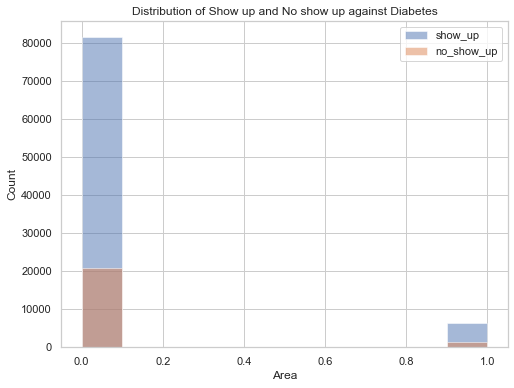

In [325]:
# Plotting an histogram showing the relationship between diabetes, show up and no show up variables with the previously created function.


plot_graph('diabetes')

The proportion of people with hypertension is higher than people with diabetes, while people with diabetes is higher than people with alcoholism. Proportionally the numbers of people that showed up are higher than those that did not. The hypothesis i wanted to test was if the severity of an illness will predict if a patient will show up or not. I assummed complication from hypertension and diabetes may post immediate danger than alcoholism, so patient with hypertension and diabetes are more likely to show up for their appointment.

### Research Question 4: How many patient with scholarship showed up for appointment and how many did not?


In [326]:
# Investigating the scholarship column

df['scholarship'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 110527 entries, 0 to 110526
Series name: scholarship
Non-Null Count   Dtype
--------------   -----
110527 non-null  int64
dtypes: int64(1)
memory usage: 863.6 KB


In [327]:
# Getting the unique values in scholarship

df['scholarship'].unique()


array([0, 1], dtype=int64)

In [328]:
df['scholarship'].nunique()

2

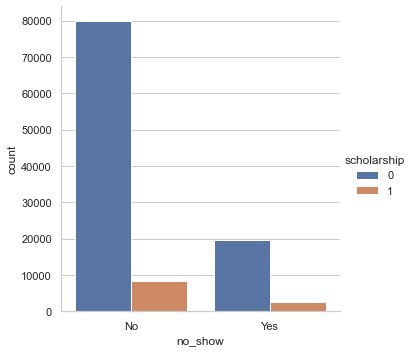

In [329]:
# Plotting a catplot because they are both categorical variable.

catplot_graph('scholarship')

The scholarship colum is a binary data with 0 = no scholarship and 1 = receive scholarship. The number of people that do not receive scholarship that showed up for their appointments is higher than those with scholarship. This supported the research that says majority of people that received relief from government are very low income earners and they spent 87% of the money on food as stated [here](https://web.archive.org/web/20070929001920/http://www.bnb.gov.br/content/aplicacao/Eventos/ForumBNB2007/docs/impactos-do-programa.pdf), i can only assumed they booked appointment and show up for the doctors appointment in only severe cases.

In [330]:
# Creating a variable for the percentage of the no_show column to plot a piechart later.

percentage_no_show = df['no_show'].value_counts(normalize=True) * 100

percentage_no_show

No     79.806744
Yes    20.193256
Name: no_show, dtype: float64

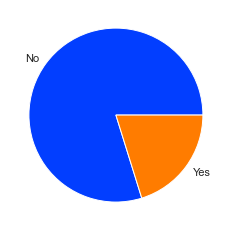

In [331]:
# Plotting a pie-chart to show the distribution of the no_show column.

colors = sns.color_palette('bright')
labels = ['No', 'Yes']

plt.pie(percentage_no_show, labels=labels, colors = colors)
plt.show()

<a id='conclusions'></a>
## Conclusions

The percentage of people that showed up for the appointment is 4 times higher than those that did not show up. However, i was not able to deduce the reason why the 20% did not show up.

>1)The catplot showed less granularity as regard showing the numbers of people that showed up and those that did not.<br>
>2)In the explanation of dataset, sms_received to be 0 = did not receive a message, and received one or more messages as stated in the data dictionary [here](https://www.kaggle.com/datasets/joniarroba/noshowappointments). However, my investigation produced a binary array value of just 0 and 1. This certainly affect the accuracy of the conclusion i can make from this analysis.<br>
>3)The time of appointment was not given as opposed the scheduled day column. This make it hard to ascertain what not showing up mean; did they miss the time on the scheduled day, did they show up on the appointment day but at different time, did thye not show up at all?<br>



**Limitation** <br>
>1)Analysis was limited to only the provided dataset, inferences was made only as regard numbers of people that showed up and those that did not show up in relation to various columns. Unfortunately, it was impossible to make cause and effect conclusion which is a shortcoming on the analysis. Maybe if their are columns that showed the patient location, it will be easy to make inference on the distance of their houses from the appointment location and predict how that can cause them to show up or not show up.<br>
>2)The process of dropping some unused columns may have induced a researcher bias effect which make the analysis skewed to the analyst view instead of letting the dataset guide the analysis.